In [1]:
import statsmodels.api as sm
import pandas
from patsy import dmatrices


In [2]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
In [5]: vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

In [4]:
df=df[vars]

In [5]:
df[-5:]

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


In [6]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data=df, return_type='dataframe')

In [7]:
y[:3]

,Lottery
0,41.0
1,38.0
2,66.0


In [8]:
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


In [9]:
mod = sm.OLS(y, X)

In [10]:
res = mod.fit()

In [11]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.07e-05
Time:                        18:30:50   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [12]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [13]:
res.rsquared

0.337950869192882

In [14]:
sm.stats.linear_rainbow(res)

(0.8472339976156913, 0.6997965543621643)

ValueError: endog and exog matrices are different sizes

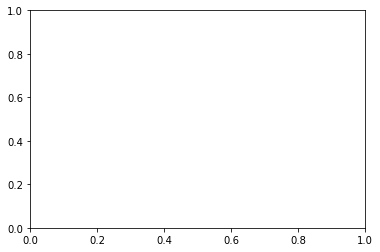

In [15]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
   ....:                              data=df, obs_labels=False)